# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [11]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

sales2=sales.where(sales["sales"]>10).dropna()
sales2

sales18=sales.where(sales["year"]==2018).dropna()
sales18

filtr= (sales["sales"]>13)&(sales["year"]==2018)
sales[filtr]
sales[~filtr]

sales.where((sales["sales"]/3)>3).dropna()

sales.where((sales["employee"].str[0])>"J").dropna()




,employee,sales,year
0,Katrina,14.0,2018.0
3,Roman,12.0,2018.0
5,Paola,3.0,2019.0


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
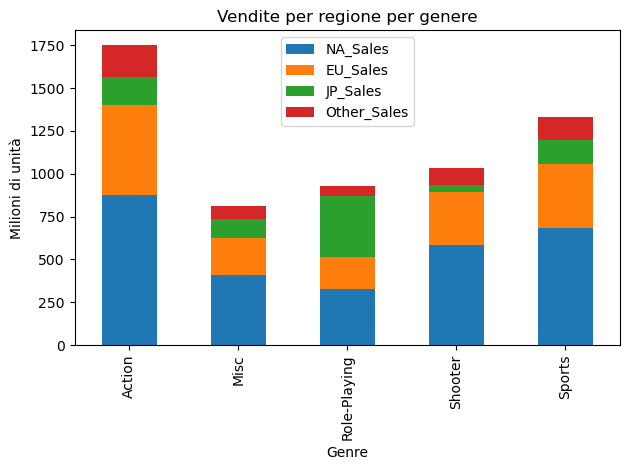


Prime cinque righe:     Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
Totale di cd pubblicati:  8915.85


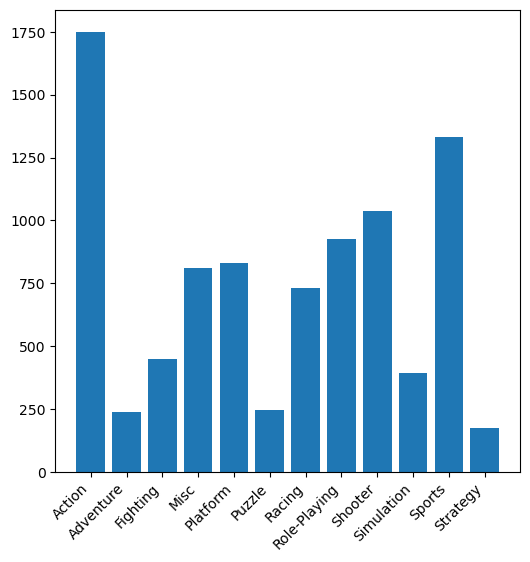

la moda è:  0    Action
Name: Genre, dtype: object


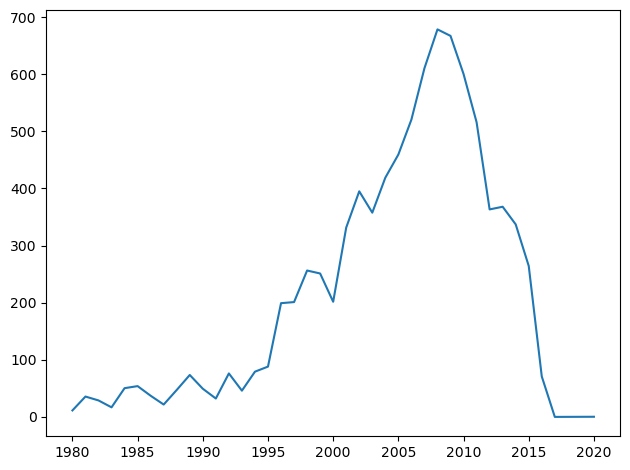

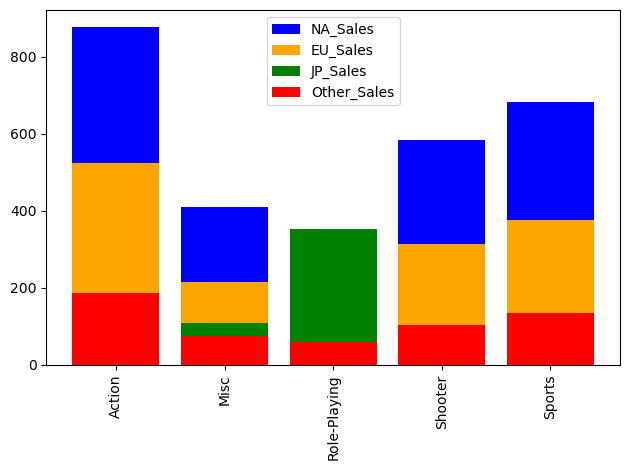

In [11]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
print("Prime cinque righe: ", df.head())


#quanti sono stati pubblicati
tot=0
col=df.columns[6:10]
col
for i in col:
    tot+=df[i].sum()
print("Totale di cd pubblicati: ", tot)

#generi più popolari con un barplot
freq = df.groupby("Genre")[col].sum().sum(axis=1)

plt.figure(figsize=(6,6))
plt.bar(freq.index, freq.values)
plt.xlabel="Generi"
plt.ylabel="Milioni di unità"
plt.title="Generi più popolari"
plt.xticks(rotation=45)
plt.xticks(ha="right")
plt.show()

moda=df["Genre"].mode()
print("la moda è: ",moda)

#numero giochi per anno
giochi=df.groupby("Year")[col].sum().sum(axis=1)

#istogramma nel tempo
plt.plot(giochi.index, giochi.values)
plt.xlabel="Anni"
plt.ylabel="Milioni di unità"
plt.tight_layout()
plt.show()

#riprodurre grafico:
c=["Action", "Misc", "Role-Playing", "Shooter", "Sports"]
unita=df[df["Genre"].isin(c)].groupby("Genre")[col].sum()
colore=["blue", "orange", "green", "red"]
for i, colonna in enumerate(col):
    plt.bar(unita.index, unita[colonna], color=colore[i], label=colonna)
plt.xlabel="Genre"
plt.ylabel="Milioni di unità"
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()